# Getting started

<span style="color:green">Notiz: alles was rot ist, ist noch nicht umgesetzt oder müsste noch überarbeitet werden durch Links etc.</span>

Here we will show a very basic example how to use grandPy to perform <span style="color:red">[kinetic modeling]</span>. For more vignettes explore the [vignettes folder](../vignettes/).

We will use data from [1](https://www.nature.com/articles/s41586-021-03610-3). These are SLAM-seq data from multiple time points (1h, 2h, 3h, 4h) after infecting Calu-3 cells with SARS-CoV-2 (or mock as control).

First we load the grandPy package and read the GRAND-SLAM that is part of the grandPy package:

In [24]:
from Py.load import * # ANPASSEN
from Py.plot import * # ANPASSEN
sars = read_grand("../data/sars_R.tsv", design=("Condition", "dur.4sU", "Replicate"))
# sars <- Normalize(sars) # R-code
print(sars)

# normalize() aus processing() !
# data slot 'norm' fehlt
# default data slot 'norm' fehlt

Detected dense format -> using dense reader
GrandPy:
Read from sars_R
1045 genes, 12 samples/cells
Available data slots: ['count', 'ntr', 'alpha', 'beta']
Available analyses: []
Available plots: {}
Default data slot: count



C:\Users\User\PycharmProjects\grandpy\Py\utils.py:61: UserWarning: 1 Duplicate gene symbols found: MATR3 (first 5); they have been renamed to ensure uniqueness (e.g., MATR3 → MATR3_1).
  warnings.warn(f"{len(duplicates_list)} Duplicate gene symbols found: {', '.join(duplicates_list[:5])} (first 5); they have been renamed to ensure uniqueness (e.g., MATR3 → MATR3_1).")


The GRAND-SLAM output normally contains any gene with at least 1 read, i.e. > 30k genes. The data set that is part of grandPy has been prefiltered and only consists of 1045 genes. For a complete workflow including filter see the [full vignette](vignette_02_kinetic_modeling.ipynb). Note that we also normalized the read counts (by using size factors), which added an additional data "slot".

<span style="color:red"> We can start by creating a plot showing the kinetics for a gene: ...</span>

In [25]:
# PlotGeneProgressiveTimecourse(sars,"SRSF6",steady.state=list(Mock=TRUE,SARS=FALSE)) # R-code
# aus modeling.py

<span style="color:red">Note that this automatically fit the kinetic model for this gene, separately for the two conditions. Modeling used the default data slot, which are the size-factor normalized values, as indicated above. By using the `steady.state` parameter, we defined the mock infected control samples to be in steady state, whereas the virus infected samples should not be assumed to be in steady state. </span>

<span style="color:red"> We now fit the kinetic model for all genes: </span>

In [26]:
# SetParallel(cores = 2)  # R-code: increase on your system, or omit the cores = 2 for automatic detection
# aus utils.py

# sars<-FitKinetics(sars,"kinetics",steady.state=list(Mock=TRUE,SARS=FALSE)) # R-code
# aus modeling.py

<span style="color:red">Modeling results are stored in two “analysis tables”:</span>

In [27]:
print(sars.analyses)
# noch leer

[]


We can retrieve this table (for more information, see the [data handling vignette](vignette_04_working_with_data_matrices_and_analysis_results):

In [28]:
print(sars.get_analysis_table())
# Hier die Abweichung, dass wir zweimal die Spalte Symbols haben, aber sonst würde da ein Index stehen, ganz ohne ging es nicht
# zudem fehlen halt eben die kinetics

          Symbol             Gene  Length      Type
Symbol                                             
UHMK1      UHMK1  ENSG00000152332    8478  Cellular
ATF3        ATF3  ENSG00000162772    2103  Cellular
PABPC4    PABPC4  ENSG00000090621    3592  Cellular
ROR1        ROR1  ENSG00000185483    5832  Cellular
ZC3H11A  ZC3H11A  ENSG00000058673   11825  Cellular
...          ...              ...     ...       ...
ERBB2      ERBB2  ENSG00000141736    4930  Cellular
GRB7        GRB7  ENSG00000141738    2243  Cellular
FLNA        FLNA  ENSG00000196924    8486  Cellular
ORF1ab    ORF1ab           ORF1ab   21290   Unknown
S              S                S    3822   Unknown

[1045 rows x 4 columns]


<span style="color:red">We can also easily plot the RNA half-lives of mock infected cells against virus infected cells:</span>

Use dense plot
[ 4514.5      188.      6001.      2911.1667  1916.5     1886.
  5552.5     5475.5     7576.5     3714.5     5532.2357  6008.6667
  6008.5    17294.8333  8866.5     6617.5     6296.5    11184.1
 10317.      9320.      1465.      5241.5     2635.5      987.
   615.5     3015.5    12397.6667  4667.8333  4056.5     5182.1667
  9698.3167  1836.     17781.3333  6785.      6837.3333  5674.5
  2650.       762.      8355.1667  7238.     11871.      2090.5
  5476.5     3662.5     4259.5     6903.8333  2189.8333  2507.3333
  1451.5     1151.5     1935.      2627.5     4801.5     2424.5
 16452.1667  4979.5     7381.5    10376.5833  2000.5    11898.5
  3269.       725.      8256.5     2882.5     7186.5     3694.
  7082.5     4934.5     1412.      6232.5      457.      7109.5
  6132.3333  9088.5667 10177.5     1212.      9102.      1484.4167
  1957.     10121.4278  4998.5    14233.5    10163.      8431.5
  2905.25    1890.      4130.5     7090.5    13545.5     8817.5
  4579.1667  952

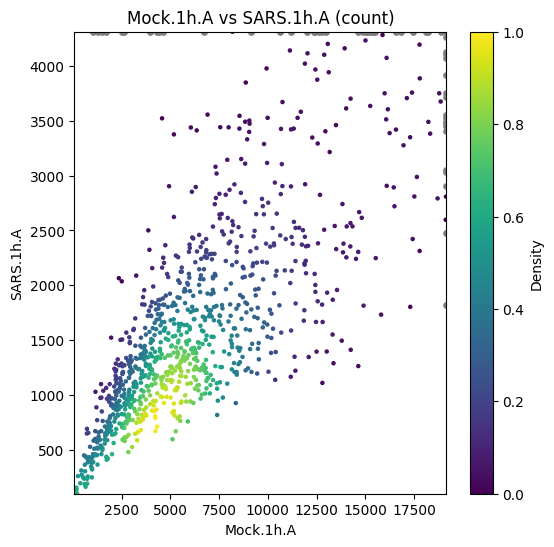

In [29]:
# plot_scatter(
#     sars,
#     x="kinetics.Mock.Half-life",
#     y="kinetics.SARS.Half-life",
#     lim=(0, 24),
#     diag=True  # für geom_abline
# )

# uns fehlen die kinetics, stattdessen das hier mal:
plot_scatter(sars, x="Mock.1h.A", y="SARS.1h.A", mode_slot="count")
# es wird gleichzeitig gerade eine Liste ausgegeben, die alle Punkte angibt ...)